## 1. Import Libraries and Load Data

In [1]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset("conll2003")

## 2. Explore the Dataset Structure

In [24]:
# Display the dataset structure
display(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [25]:
# Show a sample from the training set
display(dataset['train'][0])

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [26]:
# show ner_tags and indices
label_list = dataset['train'].features['ner_tags'].feature.names
labels_with_indices = {index:label for index, label in enumerate(label_list)}
display(labels_with_indices)

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC'}

# 3. Convert to DataFrame for Easier Manipulation

In [5]:
# Convert the training dataset to a DataFrame
train_df = pd.DataFrame(dataset['train'])
display(train_df.head())

,id,tokens,pos_tags,chunk_tags,ner_tags
0,0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


In [6]:
## 4. Basic Statistics of the Data

In [7]:
# Display basic information about the DataFrame
train_df.info()

# Summary statistics for numerical data
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14041 entries, 0 to 14040
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          14041 non-null  object
 1   tokens      14041 non-null  object
 2   pos_tags    14041 non-null  object
 3   chunk_tags  14041 non-null  object
 4   ner_tags    14041 non-null  object
dtypes: object(5)
memory usage: 548.6+ KB


,id,tokens,pos_tags,chunk_tags,ner_tags
count,14041,14041,14041,14041,14041
unique,14041,12691,9139,7878,5684
top,0,"[for, ,, against, ,, points, ), :]","[22, 11]","[11, 12]","[5, 0]"
freq,1,16,455,870,649


## 5. Distribution of NER Tags

In [8]:
# Get a count of each tag in the training data
tags_counts = train_df['ner_tags'].explode().value_counts()
display(tags_counts)

ner_tags
0    169578
5      7140
1      6600
3      6321
2      4528
4      3704
7      3438
6      1157
8      1155
Name: count, dtype: int64

In [23]:
# Access the features and get the label names for NER
label_list = dataset['train'].features['ner_tags'].feature.names
# Convert the training dataset to a DataFrame
train_df = pd.DataFrame(dataset['train'])
# Explode the 'ner_tags' to count each tag occurrence
tags_counts = train_df['ner_tags'].explode().value_counts()
# Map indices to names using the label list
tags_counts_named = tags_counts.rename(index=lambda x: label_list[x])
# Display the tag names with their counts
display(tags_counts_named)

ner_tags
O         169578
B-LOC       7140
B-PER       6600
B-ORG       6321
I-PER       4528
I-ORG       3704
B-MISC      3438
I-LOC       1157
I-MISC      1155
Name: count, dtype: int64

## 6. Plotting the Distribution of Sentence Lengths

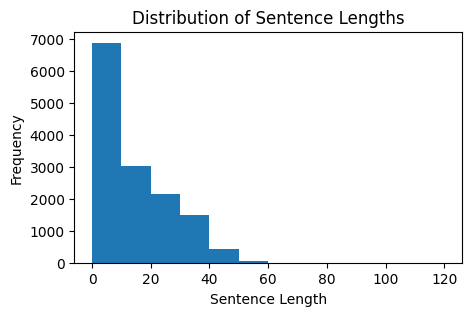

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate sentence lengths
sentence_lengths = train_df['tokens'].apply(len)
max_length = max(sentence_lengths)
bins = np.arange(0, max_length + 10, 10)  # +10 to include the maximum length in the range

# Plot the distribution of sentence lengths
plt.figure(figsize=(5, 3))
plt.hist(sentence_lengths, bins=bins)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()